
# Getting you feet wet in Deep Learning 

#### Boring stuff starts 

In [1]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import utils; reload(utils)
from utils import plots

Using cuDNN version 7003 on context None
Mapped name None to device cuda0: GeForce GT 740M (0000:07:00.0)
Using Theano backend.


In [4]:
# Import our class, and instantiate
import vgg16; reload(vgg16)
from vgg16 import Vgg16

#### Good stuff starts

In [5]:
path = "/home/dev/workspace/ai/ft-ai/data/dogscats/sample/"

In [6]:
# As large as you can, but no larger than 64 is recommended. 
# If you have an older or cheaper GPU, you'll run out of memory, so will have to decrease this.
# Same limits apply to CPU as well
batch_size=4

In [7]:
vgg = Vgg16()

In [8]:
print("Currently we have "+str(len(vgg.classes)) + " classes")
vgg.classes[:4]

Currently we have 1000 classes


[u'tench', u'goldfish', u'great_white_shark', u'tiger_shark']

In [9]:
# Grab a few images at a time for training and validation.
# NB: They must be in subdirectories named based on their category
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)


Found 16 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [10]:
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
16/16 [==============================] - 4s - loss: 0.4311 - acc: 0.8750 - val_loss: 0.4500 - val_acc: 0.6250


In [11]:
print("After fine tuning we have "+str(len(vgg.classes)) + " classes")
vgg.classes[:]

After fine tuning we have 2 classes


['cats', 'dogs']

In [12]:
imgs,labels = next(batches)

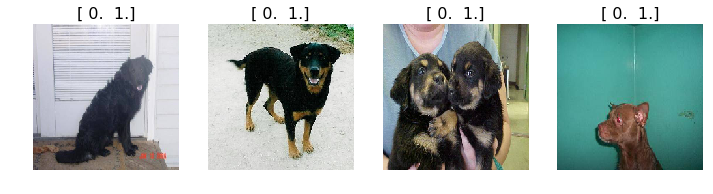

In [13]:
plots(imgs, titles=labels)

In [14]:
vgg.predict(imgs, True)

(array([ 0.9996,  1.    ,  0.9943,  0.9215], dtype=float32),
 array([1, 1, 1, 1]),
 ['dogs', 'dogs', 'dogs', 'dogs'])

###  Lets summarize

1 class encapsulating all the functionality
Using a pretrained model

## Lets discuss the VGG model now

In [15]:
vgg = Vgg16()

In [16]:
path = "/home/dev/workspace/ai/ft-ai/data/dogscats/"

In [17]:
batches = vgg.get_batches(path+'train', batch_size=4)

Found 23000 images belonging to 2 classes.


In [18]:
imgs,labels = next(batches)

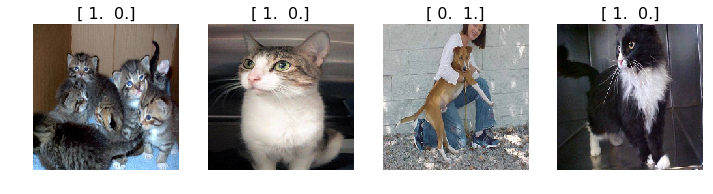

In [19]:
plots(imgs, titles=labels)

In [20]:
vgg.predict(imgs, True)

(array([ 0.4952,  0.3475,  0.5809,  0.9051], dtype=float32),
 array([281, 281, 173, 283]),
 [u'tabby', u'tabby', u'Ibizan_hound', u'Persian_cat'])

## Going indept of our code 

In [ ]:
vgg = Vgg16()

In [32]:
path = "/home/dev/workspace/ai/ft-ai/data/dogscats/"

In [ ]:
batch_size=4

In [ ]:
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)

In [ ]:
vgg.finetune(batches)

In [ ]:
vgg.fit(batches, val_batches, nb_epoch=1)

In [ ]:
imgs,labels = next(batches)

In [ ]:
plots(imgs, titles=labels)

In [ ]:
vgg.predict(imgs, True)